## Cargar los datos

In [3]:
import pandas as pd

file_path = '../simulation_results/single_queue_two_servers.csv' 
df = pd.read_csv(file_path)


df = df.drop(columns=['duration'])
 
# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()
df

,service_usage,lost_cars,mean_delay_time,effective_interarrival_mean
0,35959,56,4205.867,267.015
1,35773,78,4623.860,295.142
2,35283,99,4739.850,307.991
3,36000,108,5949.330,348.798
4,36000,79,5082.150,318.054
...,...,...,...,...
995,36000,84,4139.674,270.840
996,35892,106,4723.215,297.767
997,35816,64,3898.015,269.664
998,35741,77,4330.109,301.339


In [4]:
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,service_usage,lost_cars,mean_delay_time,effective_interarrival_mean
count,1000.000,1000.000,1000.000,1000.000
mean,35823.486,82.281,4666.470,304.994
std,235.726,17.906,550.264,26.171
min,34491.000,17.000,2625.674,242.156
25%,35717.750,70.000,4305.357,287.519
50%,35918.500,83.000,4648.019,302.914
75%,36000.000,94.250,5037.633,321.241
max,36000.000,137.000,6662.911,404.609


## Mostrar histograma con los datos

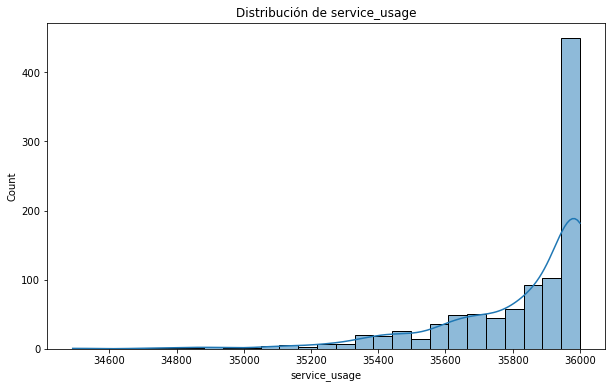

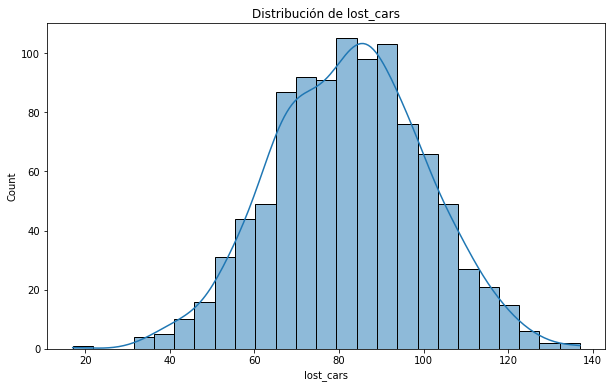

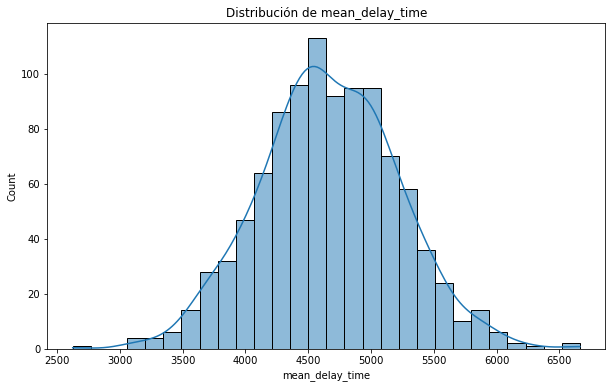

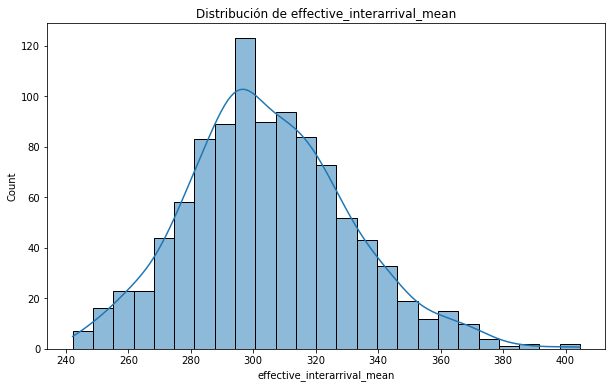

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [6]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de service_usage es 4.563741427383318
La Asimetría de service_usage es -1.9226149002093225
El kurtosis de lost_cars es -0.09882538335579971
La Asimetría de lost_cars es -0.035147920866118
El kurtosis de mean_delay_time es 0.21748792383700843
La Asimetría de mean_delay_time es 0.03799240789693601
El kurtosis de effective_interarrival_mean es 0.22967598702538705
La Asimetría de effective_interarrival_mean es 0.36492840541012256


### Test de Normalidad

In [7]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

service_usage
D = 1.0
p-value = 0.0

lost_cars
D = 1.0
p-value = 0.0

mean_delay_time
D = 1.0
p-value = 0.0

effective_interarrival_mean
D = 1.0
p-value = 0.0



La mayoría de las columnas en tu DataFrame tienen distribuciones que son menos normales, con algunas columnas que difieren significativamente de la normalidad. Esto es evidente tanto en las pruebas de kurtosis y asimetría, donde columnas con alta curtosis y asimetría positiva indican distribuciones menos normales, como en las pruebas de Kolmogorov-Smirnov, donde columnas con valores D altos y valores p bajos indican que los datos difieren significativamente de la normalidad.

Vamos a observar por medio de los siguientes gráficos como se comportan los carros perdidos según el resto de nuestras variables

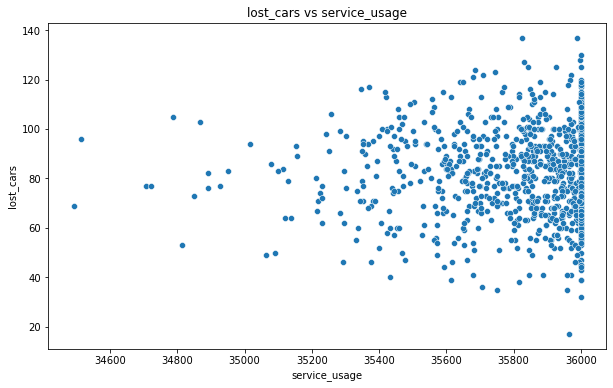

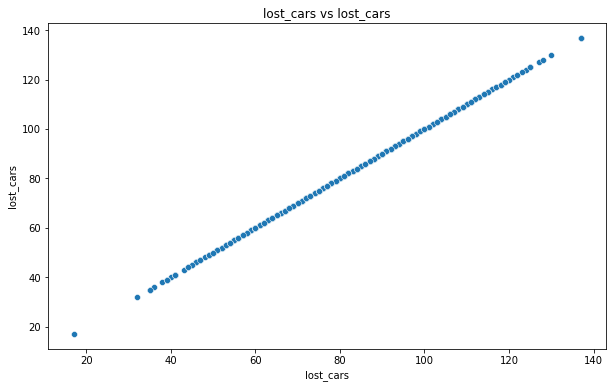

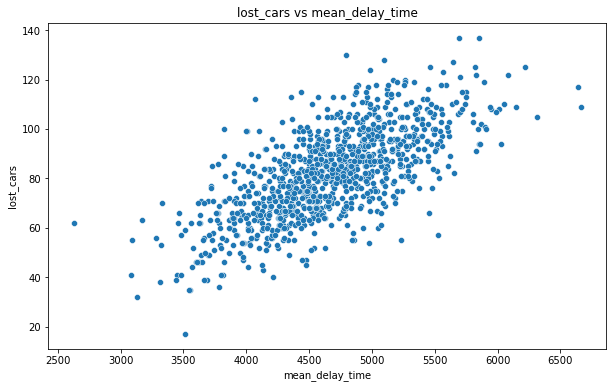

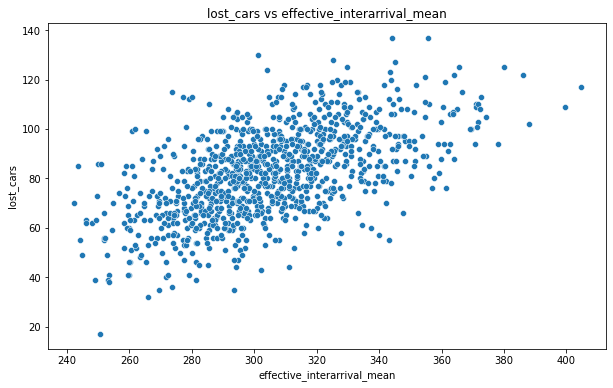

In [8]:
import seaborn as sns


# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='lost_cars', data=df)
    plt.title(f'lost_cars vs {column}')
    plt.show()

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

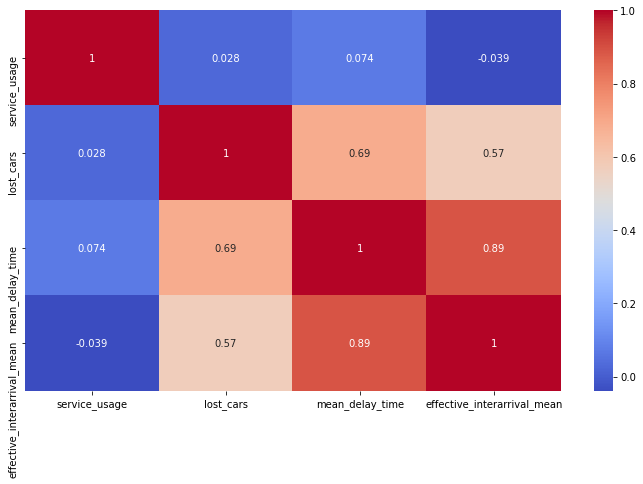

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

### Modelo 1

Vamos a hacer el análisis con todas las variables para intentar predecir Calorías

In [10]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('lost_cars', axis=1) # Variables independientes
X = X.drop('mean_delay_time', axis=1) # Variables independientes

y = df['lost_cars'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              lost_cars   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     188.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           7.90e-68
Time:                        16:58:48   Log-Likelihood:                -3287.2
No. Observations:                 800   AIC:                             6580.
Df Residuals:                     797   BIC:                             6594.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [12]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 203.41854819854225
Coeficiente de Determinación R^2: 0.36805101606735313


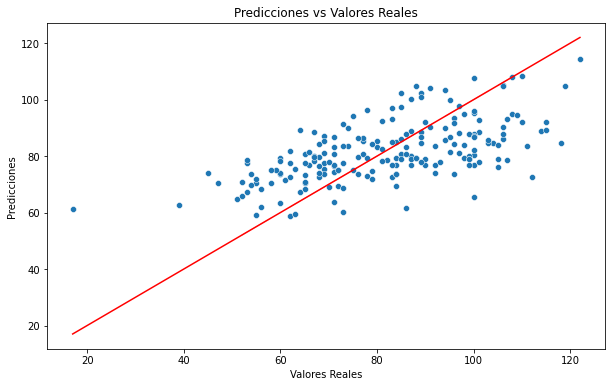

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como observamos anteriormente en los resultados de **model.summary()** vemos que hay una variable cuyo $P > |t|$ es mayor que 0.05, lo cual indica que no es significativa en el modelo y puede llevar a errores en el resultado. Por lo que hagamos otro modelo pero esta vez eliminandola.

## Análisis de residuos

In [20]:
residuos = model.resid

In [21]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -1.0824408036569366e-12
La media de los residuos es cero.
Suma de los residuos: -8.658815886519733e-10
La suma de los residuos es cero.


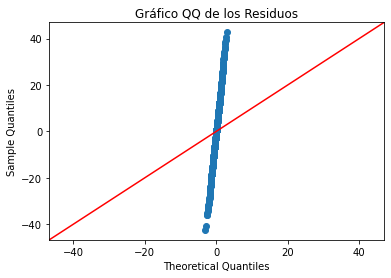

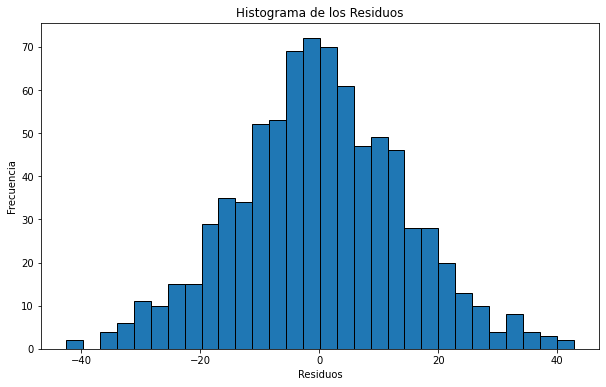

In [22]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Como vemos los residuos del modelo no siguen una distribución normal, esto puede tener varias implicaciones:

- Inferencias estadísticas: Muchos métodos estadísticos, incluyendo la regresión lineal y ANOVA, asumen que los residuos son normalmente distribuidos. Si esta suposición se viola, las inferencias estadísticas (como los intervalos de confianza y las pruebas de hipótesis) que se basan en el modelo pueden no ser válidas.
- Eficiencia del modelo: Un modelo con residuos no normales puede no ser el modelo más eficiente para los datos. Es posible que exista otro modelo que se ajuste mejor a estos.
- Violación de otros supuestos: Los residuos no normales a menudo indican que se están violando otros supuestos del modelo. Por ejemplo, podrían sugerir que la relación entre las variables no es lineal, o que la varianza de los residuos no es constante (heterocedasticidad).

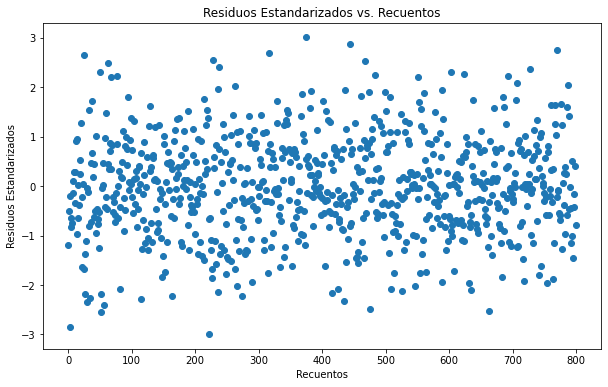

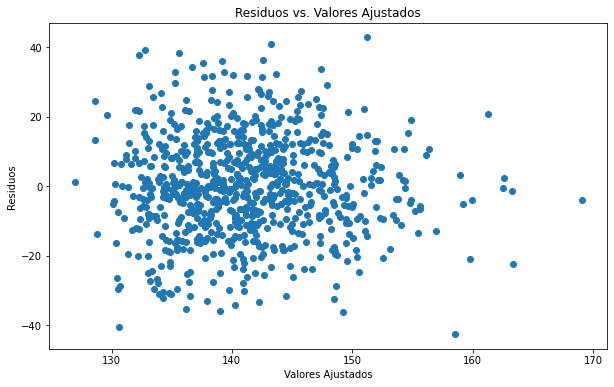

[('Lagrange multiplier statistic', 3.6345676921379244), ('p-value', 0.16246643602755476), ('f-value', 1.8187319119560432), ('f p-value', 0.16290400127885246)]


In [23]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [24]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.42567028708513294, p-value = 4.675089208631274e-132
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo

Los residuos no están normalmente distribuidos